In [604]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [523]:
def generate_config(x0=0, y0=20, n=30, dx=1.):
    x = [x0 + i*dx for i in range(n)]
    y = [y0 for _ in range(n)]
    return x,y

In [528]:
def potential(x, y, g, k):
    dx=x[1:]-x[:-1]
    dy=y[1:]-y[:-1]
    harmonic_potential = k*(np.dot(dx,dx)+np.dot(dy,dy))
    gravitational_potential = g*np.sum(y)
    return harmonic_potential + gravitational_potential

In [525]:
def mmc(potential, size, x_init, y_init, beta=1.0, step=0.5, g=9.81, k=50.):
    from random import uniform
    n = len(x_init)
    x, y, u = [],[],[]
    x.append(x_init)
    y.append(y_init)
    u.append(potential(np.array(x_init), np.array(y_init),g,k)) 
    for i in range(1, size):
        x_t, y_t, u_t=x[i-1][:], y[i-1][:], u[i-1]
        for j in range(1,n-1):
            x_ = x_t[j] + uniform(-step,step)
            y_ = y_t[j] + uniform(-step,step)
            u_ = potential(np.array(x_t[:j]+[x_]+x_t[j+1:]), np.array(y_t[:j]+[y_]+y_t[j+1:]), g, k)
            r = uniform(0,1)
            if (u_ <= u_t or r <  np.exp(-beta*(u_-u_t))) and y_>=0:
                x_t=x_t[:j]+[x_]+x_t[j+1:]
                y_t=y_t[:j]+[y_]+y_t[j+1:]
                u_t=potential(np.array(x_t),np.array(y_t), g, k)
        u.append(u_t)
        x.append(x_t)
        y.append(y_t)
    return x, y, u

In [632]:
x,y=generate_config(n=30)
x_matrix,y_matrix,u_array=mmc(potential, 5000, x, y)

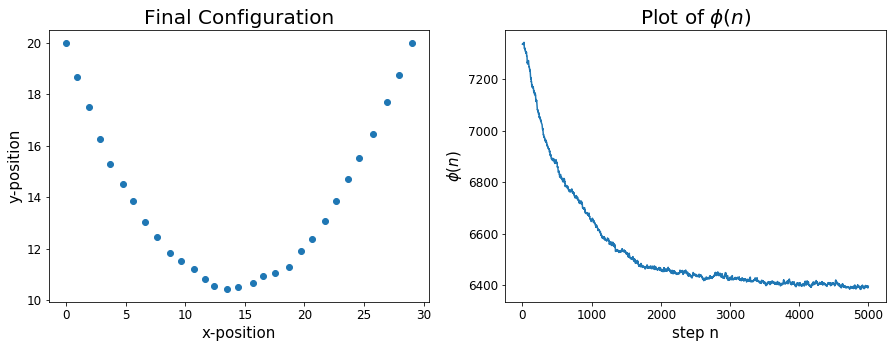

In [633]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].tick_params(labelsize=12)
axes[0].set_title('Final Configuration', fontsize = 20)
axes[0].set_xlabel("x-position", fontsize = 15)
axes[0].set_ylabel("y-position", fontsize = 15)
axes[0].scatter(x_matrix[-1][:], y_matrix[-1][:])

axes[1].tick_params(labelsize=12)
axes[1].set_title('Plot of $\phi(n)$', fontsize = 20)
axes[1].set_xlabel("step n", fontsize = 15)
axes[1].set_ylabel("$\phi(n)$", fontsize = 15)
axes[1].plot(u_array)
plt.show()